In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tqdm
plt.style.use('ggplot')

In [2]:
path = "C:/Users/hitesh/Learning/TechGiG/Sapient Lending/data/"

In [3]:
data = pd.read_csv(path+'test.csv')
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(49999, 121)

In [5]:
na_col = data.isna().sum().nonzero()

In [7]:
data.isna().sum().sort_values()

SK_ID_CURR                         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_21                   0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_16                   0
FLAG_DOCUMENT_15                   0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_3                    0
F

In [8]:
na_col

(array([  8,   9,  10,  20,  27,  28,  40,  41,  42,  43,  44,  45,  46,
         47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
         60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94, 115, 116, 117, 118,
        119, 120], dtype=int64),)

In [9]:
def selection(df, col):
    select = []
    for i in col:
        select.append(df.iloc[:,i])
    return pd.concat(select)

In [10]:
df = selection(data,na_col)
df.head()

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.shape

(49999, 67)

In [12]:
df.columns.values

array(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOOR

In [13]:
df.isna().sum().sort_values()

AMT_ANNUITY                         1
CNT_FAM_MEMBERS                     1
DAYS_LAST_PHONE_CHANGE              1
AMT_GOODS_PRICE                    38
EXT_SOURCE_2                      126
DEF_60_CNT_SOCIAL_CIRCLE          168
OBS_60_CNT_SOCIAL_CIRCLE          168
DEF_30_CNT_SOCIAL_CIRCLE          168
OBS_30_CNT_SOCIAL_CIRCLE          168
NAME_TYPE_SUITE                   192
AMT_REQ_CREDIT_BUREAU_MON        6734
AMT_REQ_CREDIT_BUREAU_WEEK       6734
AMT_REQ_CREDIT_BUREAU_DAY        6734
AMT_REQ_CREDIT_BUREAU_HOUR       6734
AMT_REQ_CREDIT_BUREAU_QRT        6734
AMT_REQ_CREDIT_BUREAU_YEAR       6734
EXT_SOURCE_3                     9944
OCCUPATION_TYPE                 15654
EMERGENCYSTATE_MODE             23698
TOTALAREA_MODE                  24148
YEARS_BEGINEXPLUATATION_AVG     24394
YEARS_BEGINEXPLUATATION_MODE    24394
YEARS_BEGINEXPLUATATION_MEDI    24394
FLOORSMAX_AVG                   24875
FLOORSMAX_MEDI                  24875
FLOORSMAX_MODE                  24875
HOUSETYPE_MO

In [14]:
m1 = data.dropna()

In [15]:
m1.shape

(1388, 121)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

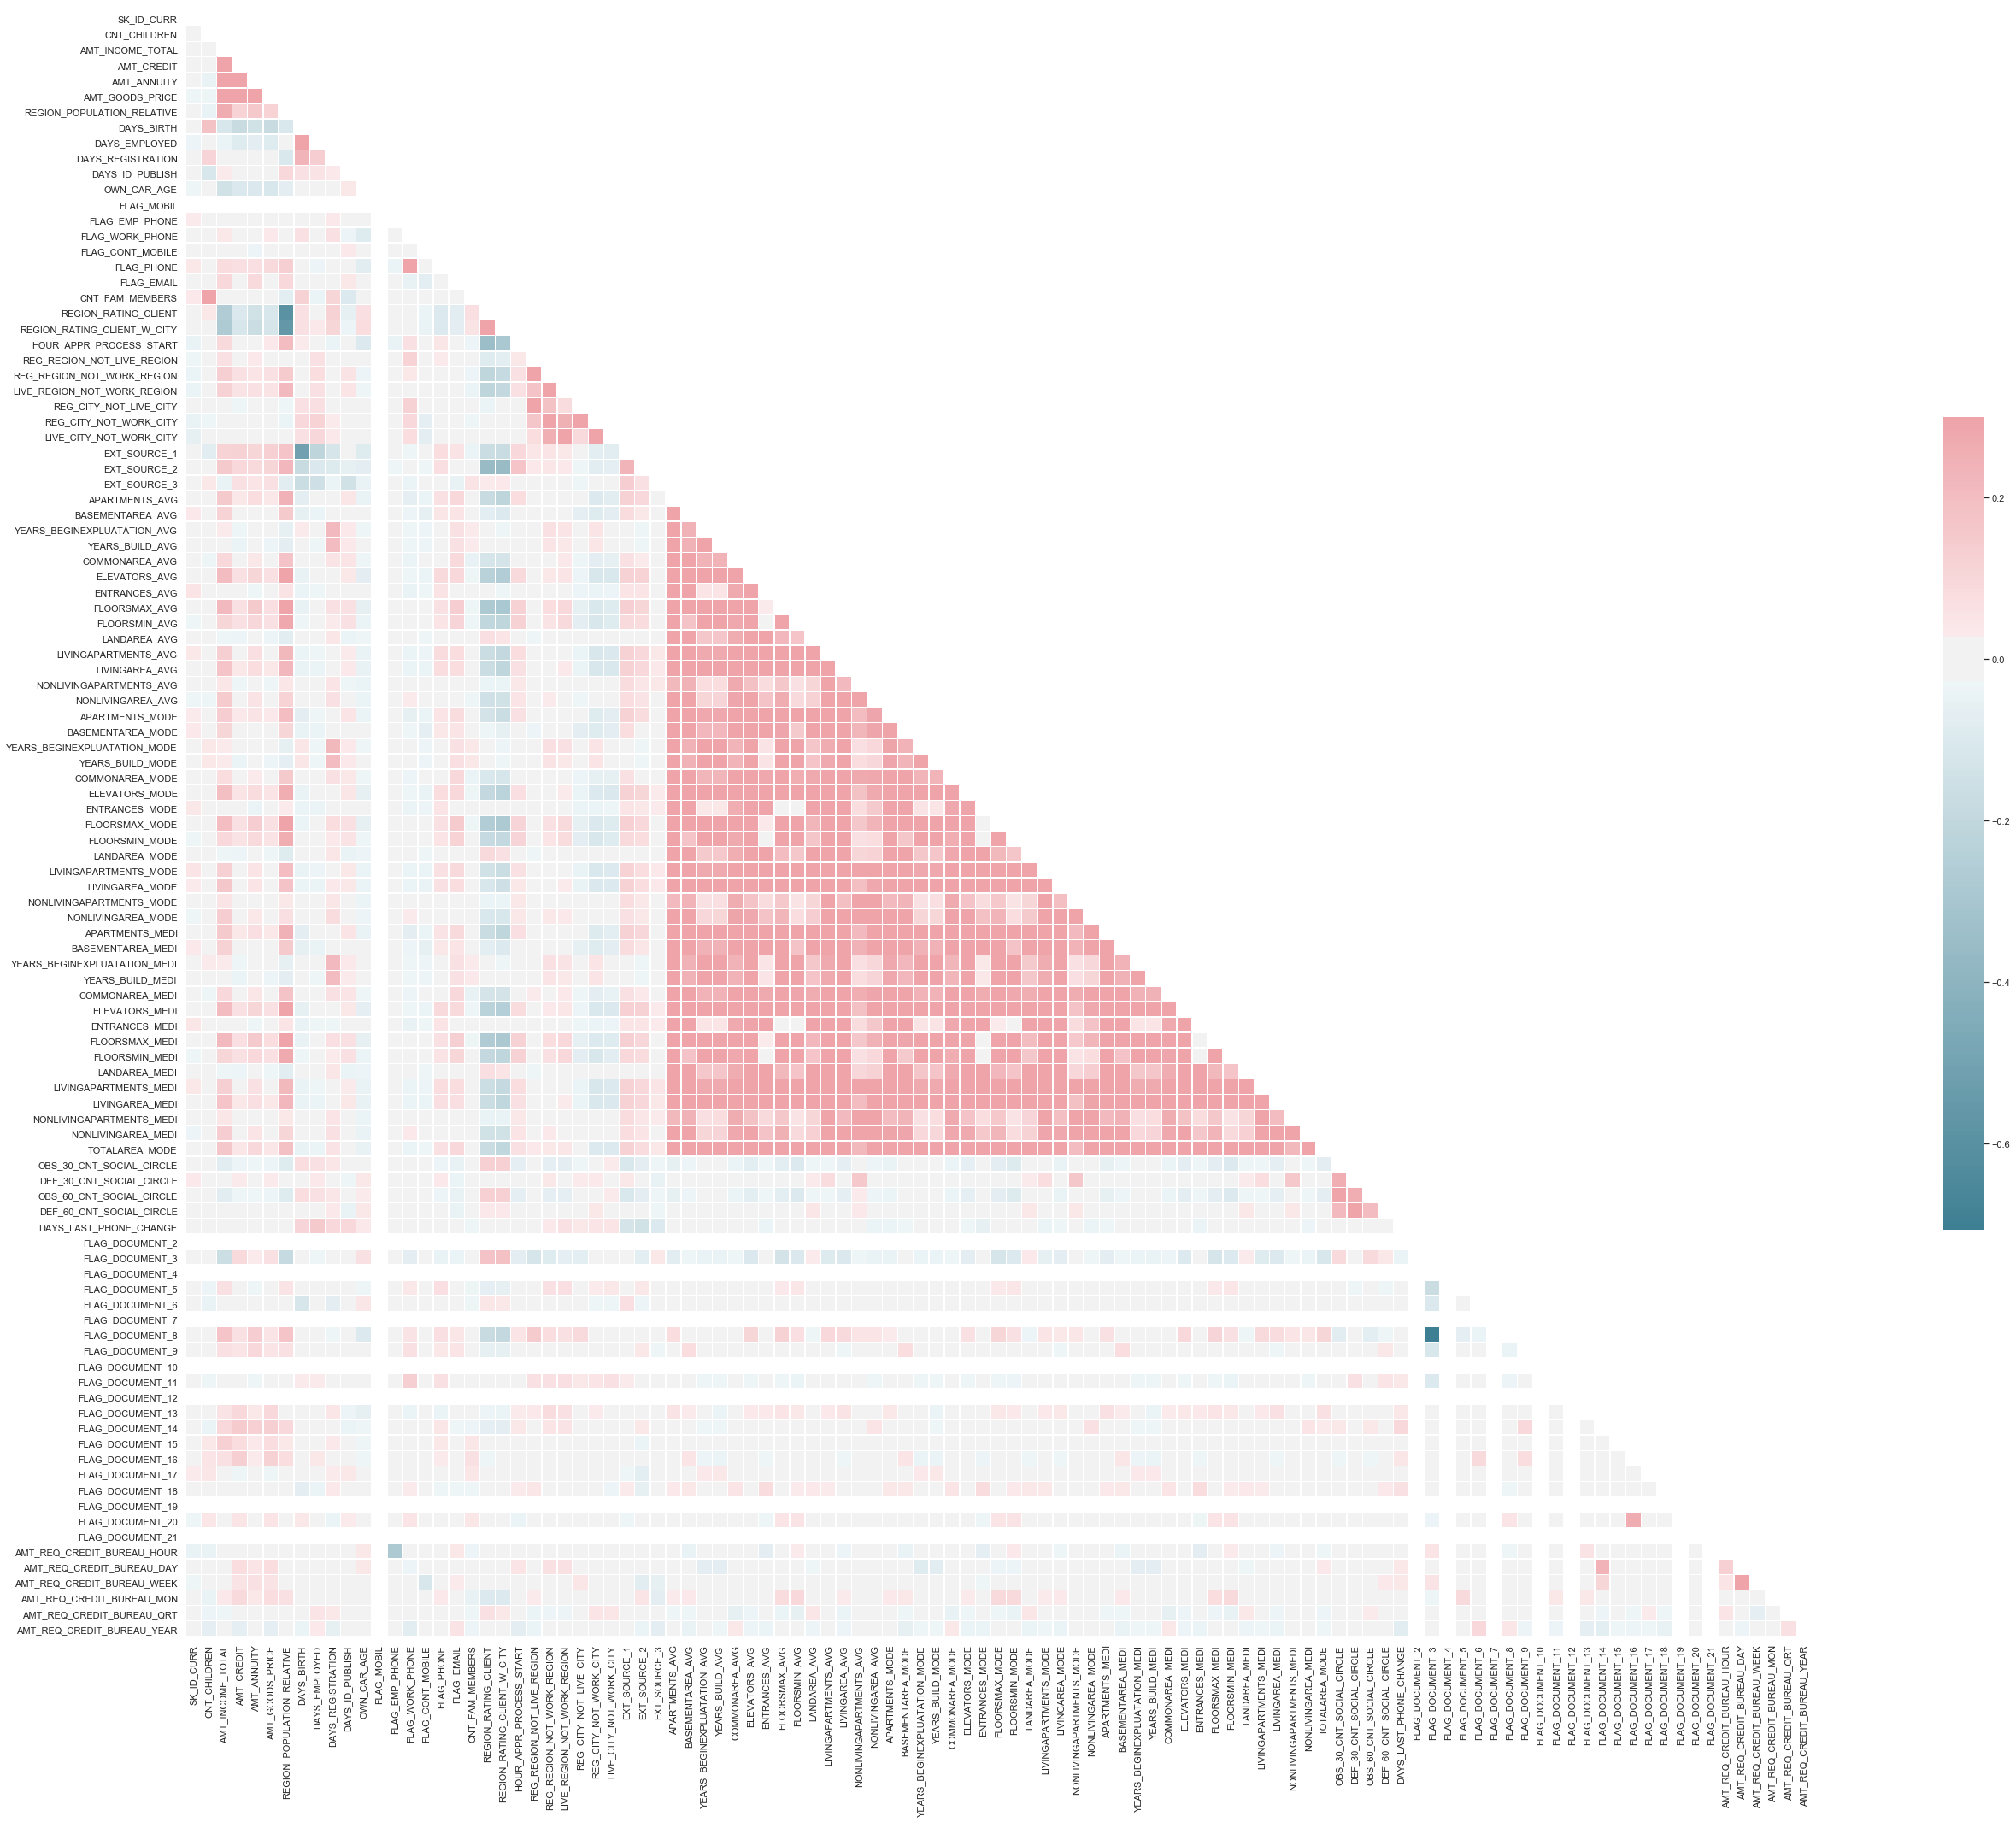

In [17]:
corr = m1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(55, 35))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### MainCode

In [18]:
col_set = [ 'CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY' ,    
'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',     
'EXT_SOURCE_3']   

In [19]:
remove_col = []
for i in df.columns:
    if i not in col_set:
        remove_col.append(i)
print(remove_col)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [20]:
remove_col2 = []
for i in data.columns:
    if i not in remove_col:
        remove_col2.append(i)
print(remove_col2)

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', '

In [21]:
# High points are missing 
data = data[remove_col2]

In [22]:
data.shape

(49999, 71)

In [23]:
data.isna().sum().sort_values()

SK_ID_CURR                         0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_7                    0
HOUR_APPR_PROCESS_START            0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_15                   0
FLAG_DOCUMENT_16                   0
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_21                   0
F

In [70]:
df1 = data.dropna()

In [71]:
df1.shape

(140414, 73)

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140414 entries, 2 to 257511
Data columns (total 73 columns):
SK_ID_CURR                     140414 non-null int64
TARGET                         140414 non-null int64
NAME_CONTRACT_TYPE             140414 non-null object
CODE_GENDER                    140414 non-null object
FLAG_OWN_CAR                   140414 non-null object
FLAG_OWN_REALTY                140414 non-null object
CNT_CHILDREN                   140414 non-null int64
AMT_INCOME_TOTAL               140414 non-null float64
AMT_CREDIT                     140414 non-null float64
AMT_ANNUITY                    140414 non-null float64
AMT_GOODS_PRICE                140414 non-null float64
NAME_TYPE_SUITE                140414 non-null object
NAME_INCOME_TYPE               140414 non-null object
NAME_EDUCATION_TYPE            140414 non-null object
NAME_FAMILY_STATUS             140414 non-null object
NAME_HOUSING_TYPE              140414 non-null object
REGION_POPULATION_RELATI

In [73]:
part = df1.select_dtypes(include= 'object')

In [74]:
part.shape

(140414, 12)

In [ ]:
for i in df1.columns.values:
    print(i)
    print(df1[i].unique())
    print(df1[i].nunique())
    print("*****************")

In [75]:
train_small_with_dummies = pd.get_dummies(part, sparse=True)

In [76]:
df1.drop(columns= part.columns, inplace= True)

C:\Users\hitesh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [77]:
df1.shape

(140414, 61)

In [78]:
df1 = df1.join(train_small_with_dummies)

In [79]:
df1.shape

(140414, 181)

### Model

In [80]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import  metrics
from sklearn.model_selection import cross_validate

In [82]:
train = df1[:123745]
train.shape

(123745, 181)

In [83]:
test = df1[123745:]
test.shape

(16669, 181)

In [84]:
target = 'TARGET'

In [85]:
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
          metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['TARGET'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['TARGET'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['TARGET'], dtrain_predprob))
    
#     Predict on testing data:
    dtest_pred = alg.predict_proba(dtest[predictors])[:,1]
#    results = test_results.merge(dtest[['ID','predprob']], on='ID')
    print ('AUC Score (Test): %f' % metrics.roc_auc_score(dtest['TARGET'], dtest_pred ))
    

In [86]:
predictors = [x for x in train.columns if x not in [target]]

In [ ]:
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=-1,
        scale_pos_weight=1,
        seed=27, verbose = True)
modelfit(xgb1, train, test, predictors)

In [ ]:
param_test1 = {
    'learning_rate' : [0.1,0.3],
    'min_child_weight':[1,3,5],
    'max_depth' : [1,3,5]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.2, n_estimators=300, max_depth=1,
                                        min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', scale_pos_weight=1, seed= 26), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5,verbose =1)
gsearch1.fit(train[predictors],train[target])

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
gsearch1.best_score_

In [42]:
gsearch1.best_score_

0.7441109331453866

In [ ]:
gsearch1.best_params_

In [40]:
gsearch1.best_params_

{'learning_rate': 0.2, 'max_depth': 1}

In [38]:
gsearch1.best_params_

{'learning_rate': 0.1, 'max_depth': 3}

In [43]:
gsearch1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=26, silent=True,
       subsample=0.8)